# Importando as bibliotecas

In [152]:
import pandas as pd
import random
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Gerando dados aleatorios

## Lista de gêneros possíveis para incluir na base de dados

In [153]:
generos_possiveis = [
    'PAGODE', 'SERTANEJO', 'CLÁSSICO', 'SAMBA', 'GOSPEL', 'ROCK', 'POP', 'ELETRÔNICA', 'FUNK', 'MPB' 
]
pesos_generos = [5, 3, 2, 1, 4, 7, 6, 8, 9, 10]

## Gerar uma lista de listas de gêneros de forma aleatória

In [154]:
random_key = 1000000

In [155]:
generos_transacoes = [
    random.choices(generos_possiveis, weights=pesos_generos, k=random.randint(1, 10))
    for _ in range(random_key)
]

## Criar um dicionário para os dados da base com o número de transações de 1 a n

In [156]:
dados_aleatorios = {
    'Transacao': range(1, random_key+1),
    'Generos': generos_transacoes
}

# Criando um DataFrame

In [157]:
# Criando um DataFrame
df = pd.DataFrame(dados_aleatorios)
df

,Transacao,Generos
0,1,"[SAMBA, PAGODE, ELETRÔNICA, FUNK]"
1,2,"[FUNK, PAGODE, ROCK, SERTANEJO]"
2,3,"[PAGODE, FUNK, PAGODE, ROCK, FUNK, ELETRÔNICA]"
3,4,"[POP, FUNK, ROCK, FUNK, MPB, GOSPEL, ELETRÔNIC..."
4,5,"[ROCK, FUNK, PAGODE, PAGODE, ROCK, PAGODE, POP..."
...,...,...
999995,999996,"[FUNK, PAGODE]"
999996,999997,"[PAGODE, ELETRÔNICA, FUNK, ROCK]"
999997,999998,"[FUNK, SERTANEJO, FUNK, FUNK, CLÁSSICO, MPB, P..."
999998,999999,"[ROCK, FUNK, PAGODE, ELETRÔNICA]"


# Contando a frequência de cada gênero musical

In [158]:
frequencias = df['Generos'].explode().value_counts()
frequencias

MPB           999900
FUNK          899992
ELETRÔNICA    799980
ROCK          699133
POP           599318
PAGODE        499366
GOSPEL        400125
SERTANEJO     299516
CLÁSSICO      199610
SAMBA         100425
Name: Generos, dtype: int64

## Plotando as frequências

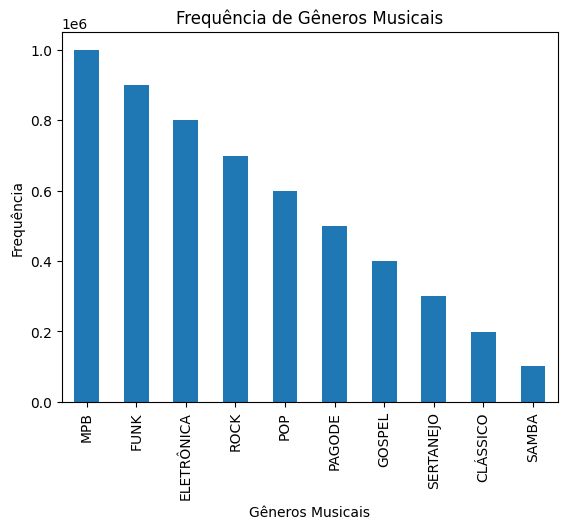

In [159]:
frequencias.plot(kind='bar')
plt.title('Frequência de Gêneros Musicais')
plt.ylabel('Frequência')
plt.xlabel('Gêneros Musicais')
plt.show()

# Calculando a probabilidade de cada gênero musical

In [160]:
total_transacoes = len(df)
probabilidades = frequencias / total_transacoes
probabilidades

MPB           0.999900
FUNK          0.899992
ELETRÔNICA    0.799980
ROCK          0.699133
POP           0.599318
PAGODE        0.499366
GOSPEL        0.400125
SERTANEJO     0.299516
CLÁSSICO      0.199610
SAMBA         0.100425
Name: Generos, dtype: float64

## Número total de transações

In [161]:
total_transacoes = len(df)

# Encontrandos os generos músicais disponíveis

In [162]:
def calcula_metricas(df, coluna_generos, genero1, genero2):
    # Número total de transações
    total_transacoes = len(df)

    # Número de transações contendo genero1 e genero2
    transacoes_com_ambos = df[coluna_generos].apply(lambda x: genero1 in x and genero2 in x).sum()

    # Número de transações contendo genero1
    transacoes_com_genero1 = df[coluna_generos].apply(lambda x: genero1 in x).sum()

    # Número de transações contendo genero2
    transacoes_com_genero2 = df[coluna_generos].apply(lambda x: genero2 in x).sum()

    # Cálculo do suporte
    suporte = transacoes_com_ambos / total_transacoes

    # Cálculo da confiança (genero1 -> genero2)
    confianca = transacoes_com_ambos / transacoes_com_genero1

    # Probabilidade de genero2
    prob_genero2 = transacoes_com_genero2 / total_transacoes

    # Cálculo do Lift (genero1 -> genero2)
    lift = confianca / prob_genero2

    return suporte, confianca, lift


## Encontrando o suporte, confianca, lift

In [163]:
suporte, confianca, lift = calcula_metricas(df, 'Generos', 'SERTANEJO', 'PAGODE')
print(suporte, confianca, lift)

0.106343 0.41613057225144 1.0806425007243747


In [164]:
generos_unicos = df['Generos'].explode().unique().tolist()
generos_unicos

['SAMBA',
 'PAGODE',
 'ELETRÔNICA',
 'FUNK',
 'ROCK',
 'SERTANEJO',
 'POP',
 'MPB',
 'GOSPEL',
 'CLÁSSICO']

# Combinar generos musicais

## Gera todas as combinações possíveis

In [165]:
combinacoes_generos = list(combinations(generos_unicos, 2))

In [166]:
resultados = {
    'Pares': [],
    'Suporte': [],
    'Confianca': [],
    'Lift': []
}

## Calcula as métricas para cada par de gêneros

In [167]:
for genero1, genero2 in combinacoes_generos:
    suporte, confianca, lift = calcula_metricas(df, 'Generos', genero1, genero2)
    resultados['Pares'].append(f"{genero1} -> {genero2}")
    resultados['Suporte'].append(suporte)
    resultados['Confianca'].append(confianca)
    resultados['Lift'].append(lift)

In [168]:
df_resultados = pd.DataFrame(resultados)

## Transforma em DataFrame

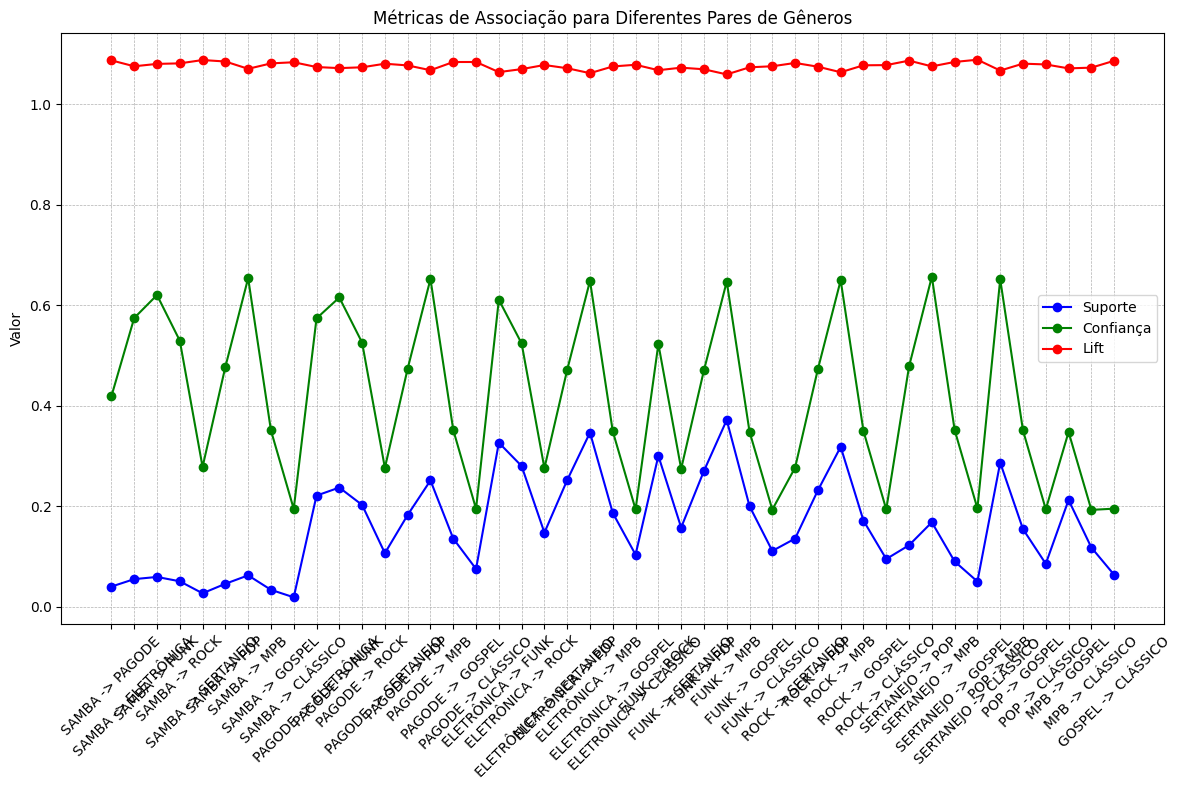

In [169]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plotando Suporte
ax.plot(df_resultados['Pares'], df_resultados['Suporte'], marker='o', label='Suporte', color='blue')

# Plotando Confiança
ax.plot(df_resultados['Pares'], df_resultados['Confianca'], marker='o', label='Confiança', color='green')

# Plotando Lift
ax.plot(df_resultados['Pares'], df_resultados['Lift'], marker='o', label='Lift', color='red')

# Ajustando as etiquetas no eixo x para que fiquem inclinadas e legíveis
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Valor')
ax.set_title('Métricas de Associação para Diferentes Pares de Gêneros')
ax.legend(loc='best')  # Adiciona a legenda no melhor lugar

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adiciona uma grade para melhor visualização
plt.show()